<a href="https://colab.research.google.com/github/Navathamarkeeri/PROJECT/blob/ML/que_1_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/Healthcare_Classification_Dataset.csv')

In [ ]:
df.shape

(1500, 16)

In [ ]:
df.head()

,ID,Name,Age,Gender,Blood Type,Medical Condition,Billing Amount,Date of Admission,Doctor,Hospital,Insurance Provider,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,1,Tiffany Ramirez,81.0,Female,O-,Diabetes,37490.98336,17-11-2022,Patrick Parker,Wallace-Hamilton,Medicare,146,Elective,01-12-2022,Aspirin,Normal
1,2,Ruben Burns,35.0,Male,O+,Asthma,47304.06485,01-06-2023,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,404,Emergency,15-06-2023,Lipitor,Normal
2,3,Chad Byrd,61.0,Male,B-,Obesity,36874.89700,09-01-2019,Paul Baker,Walton LLC,Medicare,292,Emergency,08-02-2019,Lipitor,NaN
3,4,Antonio Frederick,49.0,Male,B-,Asthma,23303.32209,02-05-2020,Brian Chandler,Garcia Ltd,Medicare,480,Urgent,03-05-2020,Penicillin,Abnormal
4,5,Mrs. Brandy Flowers,51.0,Male,O-,Arthritis,NaN,09-07-2021,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,477,Urgent,02-08-2021,Paracetamol,Normal


In [ ]:
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df.columns

Index(['ID', 'Name', 'Age', 'Gender', 'Blood_Type', 'Medical_Condition',
       'Billing_Amount', 'Date_of_Admission', 'Doctor', 'Hospital',
       'Insurance_Provider', 'Room_Number', 'Admission_Type', 'Discharge_Date',
       'Medication', 'Test_Results'],
      dtype='object')

In [ ]:
df= df.drop_duplicates(subset = ['ID'])

In [ ]:
import numpy as np
for i in ['Age','Billing_Amount']:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]
print(df.shape)

(1488, 16)


In [ ]:
df.dtypes

,0
ID,int64
Name,object
Age,float64
Gender,object
Blood_Type,object
Medical_Condition,object
Billing_Amount,float64
Date_of_Admission,object
Doctor,object
Hospital,object


In [ ]:
df.isnull().sum()

,0
ID,0
Name,1
Age,0
Gender,1
Blood_Type,1
Medical_Condition,2
Billing_Amount,0
Date_of_Admission,1
Doctor,0
Hospital,1


In [ ]:
category_columns=df.select_dtypes(include=['object']).columns
for col in category_columns:
  print(df[col].unique())

['Tiffany Ramirez' 'Ruben Burns' 'Chad Byrd' ... 'Holly Clayton'
 'Carol Byrd' 'Michael Delgado']
['Female' 'Male' nan 'M' 'F']
['O-' 'O+' 'B-' nan 'AB+' 'A+' 'AB-' 'A-' 'B+']
['Diabetes' 'Asthma' 'Obesity' 'Arthritis' 'Hypertension' nan 'Cancer'
 'arthritis' 'obesity']
['17-11-2022' '01-06-2023' '09-01-2019' ... '05-07-2019' '07-04-2020'
 '30-09-2020']
['Patrick Parker' 'Diane Jackson' 'Paul Baker' ... 'Alexis Hutchinson'
 'David Perry' 'Sandra Porter']
['Wallace-Hamilton' 'Burke, Griffin and Cooper' 'Walton LLC' ...
 'Rosales Group' 'Smith-Smith' 'Simmons Group']
['Medicare' 'UnitedHealthcare' 'Aetna' 'Cigna' 'Blue Cross']
['Elective' 'Emergency' 'Urgent' nan]
['01-12-2022' '15-06-2023' '08-02-2019' ... '28-05-2020' '27-10-2020'
 '03-10-2020']
['Aspirin' 'Lipitor' 'Penicillin' nan 'Paracetamol' 'Ibuprofen']
['Normal' nan 'Abnormal']


In [ ]:
numeric_columns=df.select_dtypes(include=np.number).columns
for col in numeric_columns:
  print(df[col].unique())

[   1    2    3 ... 1497 1498 1499]
[81. 35. 61. 49. 41. 82. 55. 33. 45. 23. 85. 72. 65. 64. 66. 79. 51. 54.
 26. 70. 74. 56. 37. 83. 30. 19. 46. 48. 34. 84. 78. 47. 60. 57. 21. 27.
 68. 31. 42. 71. 38. 28. 32. 69. 73. 67. 80. 44. 20. 59. 76. 43. 40. 36.
 29. 53. 77. 24. 75. 25. 62. 52. 39. 50. 22. 63. 58. 18.]
[37490.98336  47304.06485  36874.897    ... 44847.52527   2378.103932
 20086.90405 ]
[146 404 292 480 180 161 384 215 306 126 444 492 120 315 125 238 364 130
 293 379 298 392 162 456 197 228 137 192 258 219 414 110 465 469 182 119
 388 412 359 186 437 132 271 361 303 317 439 153 438 380 194 199 301 223
 410 205 134 407 188 405 358 147 115 263 493 356 142 139 482 141 397 347
 245 143 108 268 176 462 484 329 335 201 309 389 217 299 275 181 401 214
 267 211 247 184 140 416 179 289 350 104 220 464 419 445 398 336 413 145
 148 432 430 406 295 175 409 424 168 136 459 261 257 170 451 372 202 394
 264 279 260 499 452 365 340 360 290 103 187 378 334 470 252 450 106 259
 344 489 276 155 4

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Gender']=df['Gender'].replace ({'M':'Male','F':'Female'})

<ipython-input-99-0aa6853e60a2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


In [ ]:
columns_to_fill=['Age','Billing Amount']
for col in columns_to_fill:
  df[i].fillna(df[i].mean(), inplace=True)

<ipython-input-100-90e3715822c7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(), inplace=True)


In [ ]:
columns_to_fill=['Name','Gender', 'Blood_Type', 'Medical_Condition',
       'Billing_Amount', 'Date_of_Admission','Hospital','Admission_Type','Discharge_Date',
       'Medication']

for col in columns_to_fill:
  df[i]=df[i].fillna(df[i].mode()[0])

In [ ]:
df=df.dropna(subset=['Test_Results'])

In [ ]:
df=df[df['Age']>=0]

In [ ]:
df = pd.get_dummies(df, columns=['Gender','Blood_Type', 'Medical_Condition','Insurance_Provider', 'Admission_Type', 'Medication'])

In [ ]:
df=df.drop(columns=['ID','Name','Doctor','Hospital','Room_Number','Discharge_Date','Date_of_Admission'])

In [ ]:

df['Test_Results'] = df['Test_Results'].map({'Normal': 0, 'Abnormal': 1})

df.corr()

,Age,Billing_Amount,Test_Results,Gender_Female,Gender_Male,Blood_Type_A+,Blood_Type_A-,Blood_Type_AB+,Blood_Type_AB-,Blood_Type_B+,...,Insurance_Provider_Medicare,Insurance_Provider_UnitedHealthcare,Admission_Type_Elective,Admission_Type_Emergency,Admission_Type_Urgent,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
Age,1.000000,-0.019597,-0.031113,0.016764,-0.016764,0.044330,0.001936,0.009687,0.005447,-0.018219,...,-0.027927,0.015497,-0.025759,-0.015167,0.038606,-0.003576,-0.036806,-0.009495,0.010704,0.038693
Billing_Amount,-0.019597,1.000000,-0.036286,-0.007169,0.007169,0.002508,0.020025,0.001419,-0.001412,-0.039843,...,-0.002409,-0.010145,0.006761,-0.039496,0.031268,0.012081,-0.041733,0.044861,-0.001034,-0.016062
Test_Results,-0.031113,-0.036286,1.000000,-0.027739,0.027739,-0.018819,-0.010701,0.015537,0.034463,0.004166,...,-0.028918,0.016561,0.018387,-0.030017,0.009761,-0.007658,-0.033913,0.041016,-0.003877,0.002590
Gender_Female,0.016764,-0.007169,-0.027739,1.000000,-1.000000,-0.028777,-0.031998,0.018206,0.053637,-0.032077,...,0.007264,-0.015467,0.000471,0.004759,-0.003798,0.021911,-0.006522,-0.038954,0.014486,0.010265
Gender_Male,-0.016764,0.007169,0.027739,-1.000000,1.000000,0.028777,0.031998,-0.018206,-0.053637,0.032077,...,-0.007264,0.015467,-0.000471,-0.004759,0.003798,-0.021911,0.006522,0.038954,-0.014486,-0.010265
Blood_Type_A+,0.044330,0.002508,-0.018819,-0.028777,0.028777,1.000000,-0.141356,-0.143481,-0.145170,-0.129584,...,0.000839,-0.016218,0.002232,-0.033273,0.031546,-0.015518,0.005052,-0.037097,0.042743,0.008153
Blood_Type_A-,0.001936,0.020025,-0.010701,-0.031998,0.031998,-0.141356,1.000000,-0.148924,-0.150677,-0.134499,...,-0.005495,-0.027097,0.028165,-0.015334,-0.012143,0.002308,-0.017104,-0.004623,-0.006716,0.025143
Blood_Type_AB+,0.009687,0.001419,0.015537,0.018206,-0.018206,-0.143481,-0.148924,1.000000,-0.152943,-0.136521,...,-0.005036,0.020453,0.029371,-0.022236,-0.010659,-0.012651,-0.031903,0.014450,-0.000742,0.029514
Blood_Type_AB-,0.005447,-0.001412,0.034463,0.053637,-0.053637,-0.145170,-0.150677,-0.152943,1.000000,-0.138129,...,-0.003658,0.011429,-0.001664,0.018426,-0.016193,0.027231,0.004735,-0.013857,0.037233,-0.052455
Blood_Type_B+,-0.018219,-0.039843,0.004166,-0.032077,0.032077,-0.129584,-0.134499,-0.136521,-0.138129,1.000000,...,-0.039294,-0.001723,-0.016350,0.024867,-0.008083,0.069428,-0.006426,-0.011131,-0.031396,-0.022455


In [ ]:
x = df.drop(['Test_Results', 'Admission_Type_Elective', 'Insurance_Provider_Medicare'], axis=1)
y = df['Test_Results']

In [ ]:
df['Test_Results'].value_counts()

,count
Test_Results,
0,965
1,520


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
y_train=pd.Series(y_train)

In [ ]:
smote=SMOTE(random_state=42)

In [ ]:
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [ ]:
print('After Oversampling for X_train:')
print(y_train_smote.value_counts())

After Oversampling for X_train:
Test_Results
0    758
1    758
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train_smote,y_train_smote)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# List of models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('Naive Bayes', GaussianNB())
]

results = []
names = []

for name, model in models:
    model.fit(X_train_smote, y_train_smote)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data
    accuracy = model.score(X_test, y_test)  # Compute accuracy

    results.append(accuracy)
    names.append(name)

    print(f"{name}: Accuracy: {accuracy:.3f}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}\n")


Logistic Regression: Accuracy: 0.579
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       207
           1       0.29      0.27      0.28        90

    accuracy                           0.58       297
   macro avg       0.49      0.49      0.49       297
weighted avg       0.57      0.58      0.57       297


Decision Tree: Accuracy: 0.559
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.71      0.61      0.66       207
           1       0.33      0.43      0.37        90

    accuracy                           0.56       297
   macro avg       0.52      0.52      0.52       297
weighted avg       0.60      0.56      0.57       297




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest: Accuracy: 0.620
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       207
           1       0.32      0.22      0.26        90

    accuracy                           0.62       297
   macro avg       0.51      0.51      0.50       297
weighted avg       0.58      0.62      0.60       297


Support Vector Machine: Accuracy: 0.401
Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.72      0.23      0.35       207
           1       0.31      0.80      0.45        90

    accuracy                           0.40       297
   macro avg       0.52      0.51      0.40       297
weighted avg       0.60      0.40      0.38       297


Naive Bayes: Accuracy: 0.697
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       207
     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


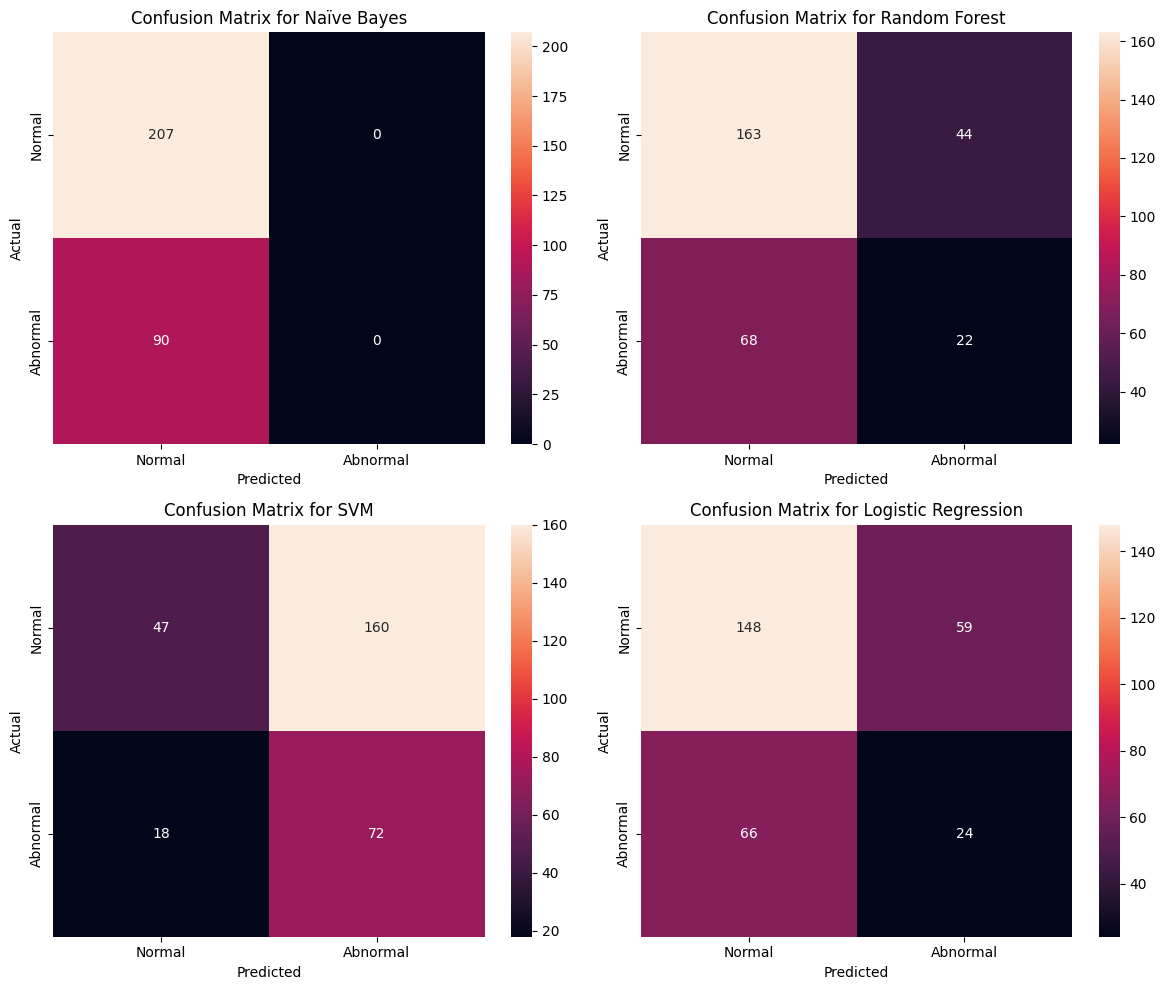

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# Assuming you have trained the models and assigned them to these variables:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_smote, y_train_smote)

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_smote, y_train_smote)

svm_model = SVC()
svm_model.fit(X_train_smote, y_train_smote)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_smote, y_train_smote)

# Dictionary of models
models = {
    "Naïve Bayes": naive_bayes_model,
    "Random Forest": random_forest_model,
    "SVM": svm_model,
    "Logistic Regression": logistic_regression_model
}

plt.figure(figsize=(12, 10))

for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)  # Predict using the model
    cm = confusion_matrix(y_test, y_pred)  # Compute confusion matrix

    plt.subplot(2, 2, i)  # Adjust grid size based on the number of models
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=['Normal', 'Abnormal'],
                yticklabels=['Normal', 'Abnormal'])

    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

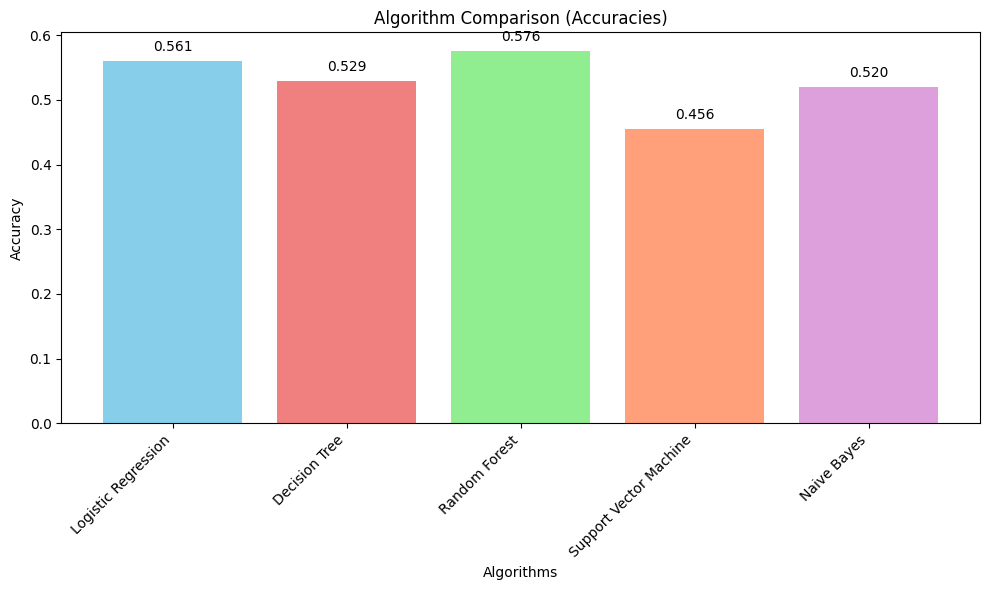

In [ ]:
# prompt: #bar plot for algorithm comparison(accuracies of models) with labelling accuracy values

import matplotlib.pyplot as plt

# Sample accuracy data (replace with your actual results)
algorithms = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'Naive Bayes']
accuracies = resultsf1  # Use the 'results' list from your previous code

plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'plum'])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Algorithm Comparison (Accuracies)")

# Add accuracy values on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
